In [33]:
import scanpy as sc
import cellrank as cr
import pandas as pd
import palantir
import matplotlib.pyplot as plt
import numpy as np

In [341]:
sc.settings._vector_friendly=True

In [2]:
sc.settings.figdir="../result/11.15_mes_lineage_modify/"

In [3]:
dpt=sc.read("../../temp_data/10.27_dpt_sub.h5ad")

In [7]:
adata=dpt[lineage["lineage_mesenchyme"]]
lineage=pd.read_csv("../../important_processed_data/11.2_dpt_lineage_infer.csv",index_col=0)

In [11]:
adata.obs["start"]

Unnamed: 0
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0                                         None
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0                                         None
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0                                         None
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0                                         None
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0                                         None
                                                                            ...          
PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGTTGCATAACAGA-1_3-1    LimbEmbryo_Mesenchyme
PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGTTGTCCATATGG-1_3-1                     None
PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGTTGTCGACCATA-1_3-1                     None
PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGTTGTCGTTGTAG-1_3-1    LimbEmbryo_Mesenchyme
PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGTTGTCTGCGGCA-1_3-1    LimbEmbryo_Mesenchyme

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


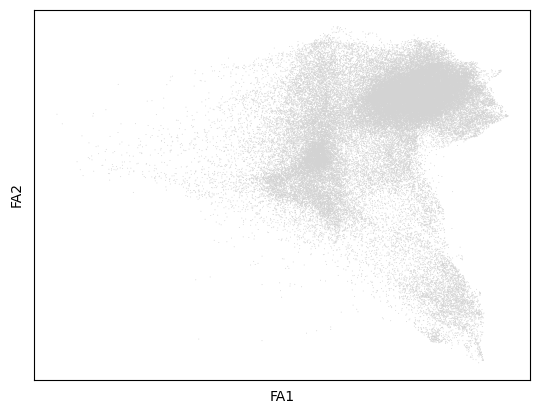

In [9]:
sc.pl.draw_graph(adata)

In [12]:
adata.obsm["X_pca"]=adata.obsm["X_scANVI"]

In [15]:
dm_res = palantir.utils.run_diffusion_maps(adata, n_components=15)

2023-11-15 23:26:57.580696: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-15 23:26:57.580848: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-15 23:26:57.580930: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-15 23:27:01.246946: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [16]:
dm_res = palantir.utils.run_diffusion_maps(adata, n_components=15)
ms_data = palantir.utils.determine_multiscale_space(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [22]:
adata.obsm["X_umap_orig"]=adata.obsm["X_umap"]

In [ ]:
sc.tl.draw

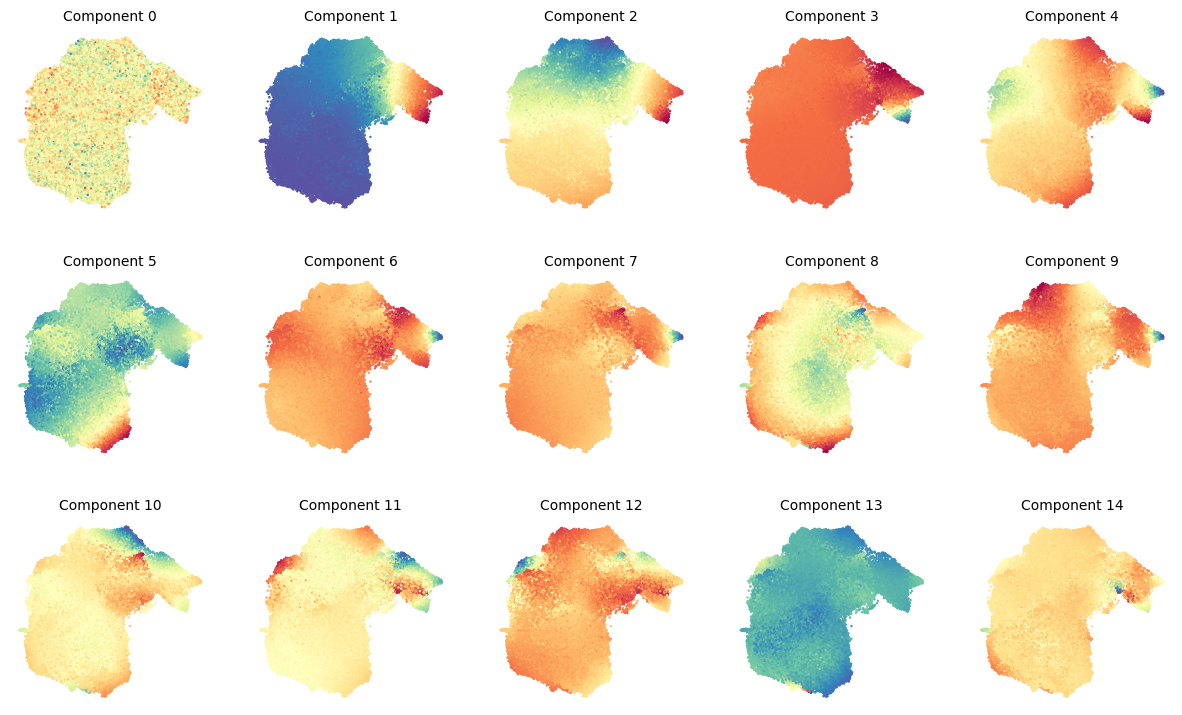

In [25]:
palantir.plot.plot_diffusion_components(adata)
plt.show()

In [51]:
adata

AnnData object with n_obs × n_vars = 63946 × 17312
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'lei

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


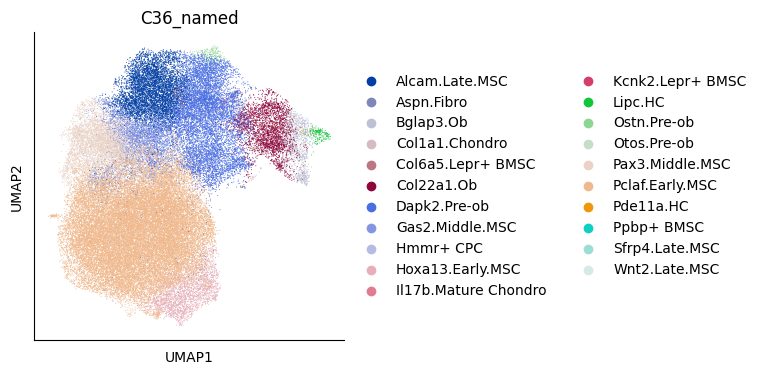

In [83]:
sc.pl.umap(adata,color=["C36_named"])

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


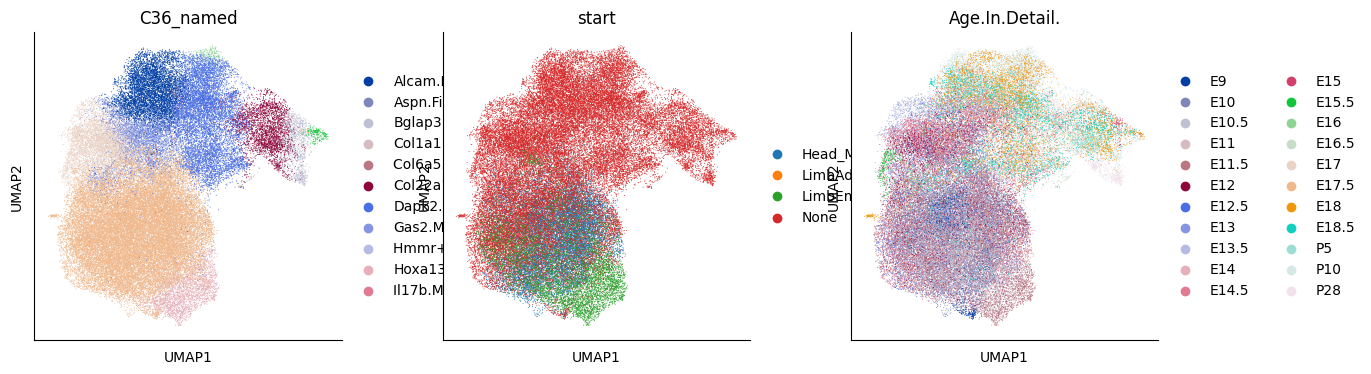

In [53]:
sc.pl.umap(adata,color=["C36_named","start","Age.In.Detail."])

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


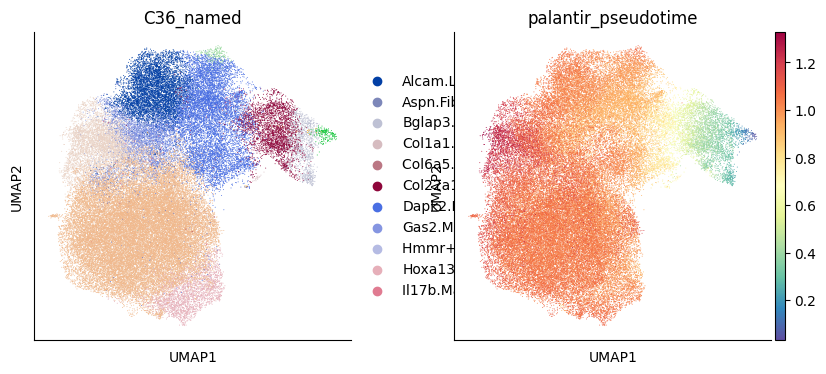

In [57]:
sc.pl.umap(adata,color=["C36_named","palantir_pseudotime"])

In [34]:
endCell = pd.Series(
    ["bone"],
    index=[dpt.obs_names[np.flatnonzero(dpt.obs['C90_named']  == 'Bglap3.Ob')[0]]]
)

In [56]:
adata.obs["palantir_pseudotime"]

Unnamed: 0
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0                        1.018208
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0                        0.629013
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0                        0.588962
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0                        0.887680
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0                        0.972486
                                                                      ...   
PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGTTGCATAACAGA-1_3-1    0.996966
PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGTTGTCCATATGG-1_3-1    0.971108
PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGTTGTCGACCATA-1_3-1    1.098547
PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGTTGTCGTTGTAG-1_3-1    0.989184
PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGTTGTCTGCGGCA-1_3-1    0.990006
Name: palantir_pseudotime, Length: 63946, dtype: float64

In [59]:
startCell = pd.Series(
    ["MSC"],
    index=[
           adata.obs_names[np.flatnonzero(adata.obs['start']  == 'LimbEmbryo_Mesenchyme')[0]]]
)

In [60]:
startCell

Forelimb_He_E11_limb3_11_0GCAATCAAGTGGCACA_1-1    MSC
dtype: object

(<Figure size 400x400 with 1 Axes>, <AxesSubplot: >)

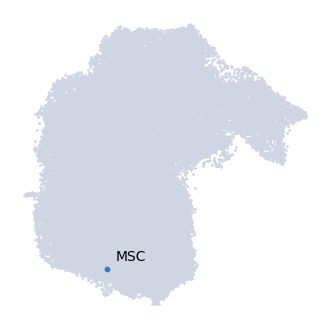

In [61]:
palantir.plot.highlight_cells_on_umap(adata, startCell)

In [63]:
pr_res = palantir.core.run_palantir(
    adata, startCell.index[0], num_waypoints=500, terminal_states=endCell
)

Sampling and flocking waypoints...
Time for determining waypoints: 0.3530755241711934 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 2.708222758769989 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [70]:
adata.obs["new_palantir_raw"]=pr_res.pseudotime

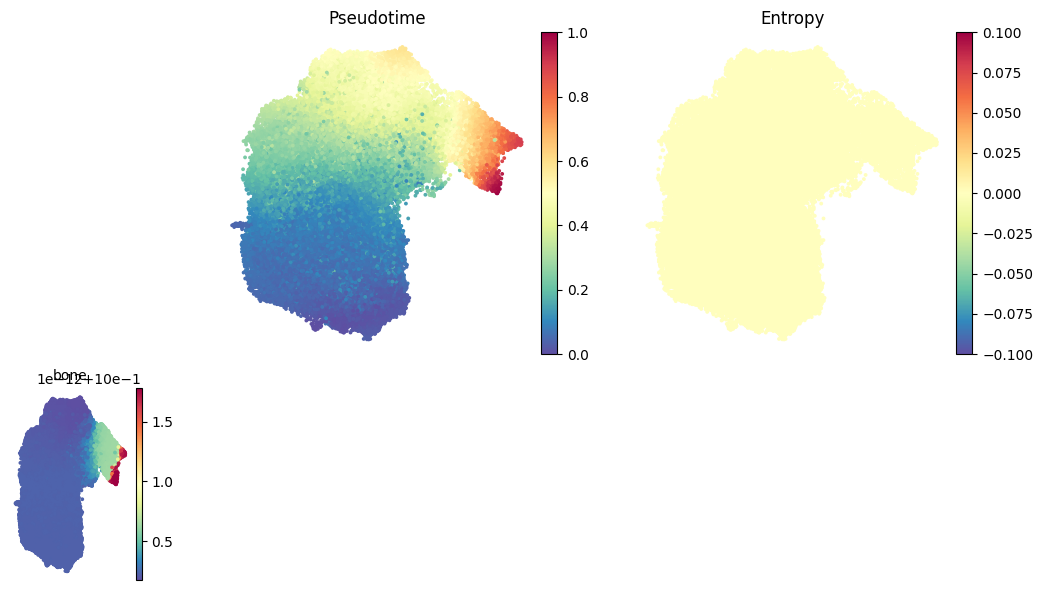

In [64]:
palantir.plot.plot_palantir_results(adata, s=3)
plt.show()

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


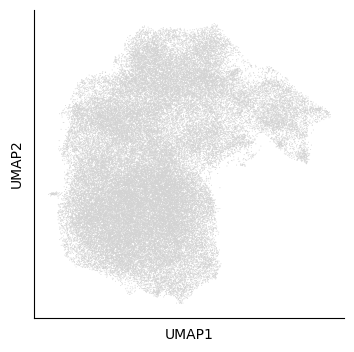

In [71]:
sc.pl.umap(adata,)

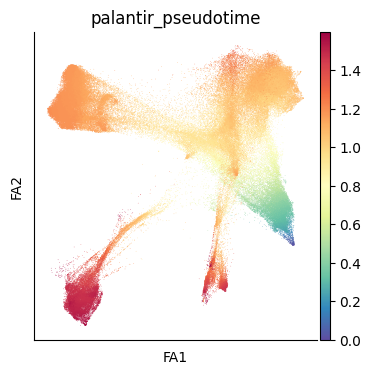

In [75]:
sc.pl.draw_graph(dpt,color="palantir_pseudotime")

In [77]:
adata

AnnData object with n_obs × n_vars = 63946 × 17312
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'lei

In [86]:
dpt.obs["pseudoStage"]="Stemcell stage"
dpt.obs["pseudoStage"][dpt.obs["C19_named"]=="Ob"]="Osteoblast stage"
dpt.obs["pseudoStage"][dpt.obs["C19_named"]=="Pre-ob"]="Immediate stage"

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


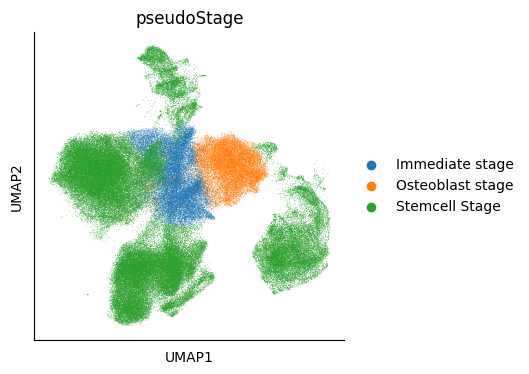

In [82]:
sc.pl.umap(dpt,color="pseudoStage")

In [85]:
dpt

AnnData object with n_obs × n_vars = 166204 × 17312
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'le

In [94]:
dpt_ob=dpt.obs["palantir_pseudotime"][dpt.obs["pseudoStage"]=="Osteoblast stage"]
dpt_preob=dpt.obs["palantir_pseudotime"][dpt.obs["pseudoStage"]=="Immediate stage"]

In [93]:
dpt_ob

Series([], Name: palantir_pseudotime, dtype: float64)

(array([1.400e+01, 5.000e+00, 1.000e+00, 8.000e+00, 2.000e+01, 3.900e+01,
        8.800e+01, 1.410e+02, 1.710e+02, 2.050e+02, 3.090e+02, 3.310e+02,
        5.410e+02, 2.680e+02, 4.690e+02, 1.053e+03, 3.800e+02, 4.470e+02,
        6.460e+02, 9.080e+02, 1.009e+03, 1.410e+02, 6.040e+02, 1.037e+03,
        1.070e+03, 6.140e+02, 1.340e+02, 3.420e+02, 2.480e+02, 5.630e+02,
        8.850e+02, 4.100e+02, 1.640e+02, 2.230e+02, 1.680e+02, 2.280e+02,
        2.520e+02, 2.770e+02, 2.940e+02, 3.230e+02, 2.930e+02, 2.120e+02,
        2.100e+02, 1.860e+02, 1.240e+02, 1.730e+02, 1.310e+02, 7.400e+01,
        9.200e+01, 1.910e+02, 2.740e+02, 2.120e+02, 1.590e+02, 1.010e+02,
        8.400e+01, 9.900e+01, 1.320e+02, 9.800e+01, 1.070e+02, 1.070e+02,
        5.900e+01, 5.600e+01, 3.900e+01, 2.900e+01, 3.900e+01, 2.700e+01,
        2.500e+01, 2.200e+01, 1.400e+01, 1.100e+01, 9.000e+00, 8.000e+00,
        1.600e+01, 2.100e+01, 1.500e+01, 2.800e+01, 4.700e+01, 4.500e+01,
        4.300e+01, 3.400e+01, 3.100e+0

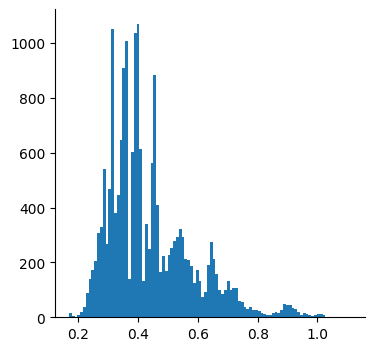

In [95]:
plt.hist(dpt_ob, bins=100, label='chondro_dpt')


(array([2.000e+00, 3.000e+00, 6.000e+00, 3.000e+00, 2.000e+00, 4.000e+00,
        4.000e+00, 5.000e+00, 0.000e+00, 5.000e+00, 5.000e+00, 9.000e+00,
        1.700e+01, 1.600e+01, 1.700e+01, 2.600e+01, 3.100e+01, 2.100e+01,
        2.300e+01, 4.200e+01, 8.300e+01, 6.900e+01, 8.200e+01, 1.150e+02,
        1.510e+02, 1.220e+02, 1.130e+02, 1.180e+02, 1.710e+02, 2.540e+02,
        3.760e+02, 4.680e+02, 4.270e+02, 3.700e+02, 2.750e+02, 2.340e+02,
        2.860e+02, 2.980e+02, 3.510e+02, 3.790e+02, 4.670e+02, 4.760e+02,
        4.680e+02, 4.720e+02, 5.370e+02, 6.630e+02, 8.210e+02, 1.015e+03,
        1.122e+03, 1.246e+03, 1.283e+03, 1.276e+03, 1.043e+03, 6.930e+02,
        4.980e+02, 3.950e+02, 4.780e+02, 6.860e+02, 5.150e+02, 4.030e+02,
        3.630e+02, 3.860e+02, 3.510e+02, 3.020e+02, 1.950e+02, 1.660e+02,
        2.470e+02, 1.280e+02, 5.600e+01, 8.600e+01, 4.300e+01, 8.800e+01,
        2.400e+01, 2.600e+01, 1.050e+02, 3.400e+01, 2.400e+01, 4.200e+01,
        2.100e+01, 1.900e+01, 4.000e+0

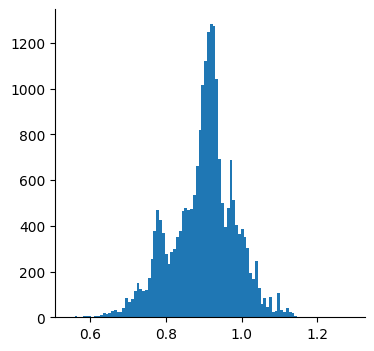

In [91]:
plt.hist(dpt_preob, bins=100)

(array([   49.,    50.,    75.,    31.,    42.,    47.,    73.,    30.,
           64.,    56.,    33.,    40.,    42.,    74.,   189.,   293.,
          405.,   756.,   582.,  1400.,   755.,  1318.,  1379.,   439.,
         1753.,  1267.,   398.,   543.,  1355.,   414.,   328.,   404.,
          476.,   544.,   493.,   407.,   316.,   310.,   153.,   300.,
          490.,   345.,   221.,   389.,   394.,   500.,   384.,   559.,
         1015.,   895.,   626.,   730.,  1026.,  1167.,  1414.,  2182.,
         2994.,  3631.,  3609.,  3130.,  4640.,  6664.,  6832.,  5496.,
        10446.,  6753.,  5118.,  5442.,  3339.,  2850.,  9057.,  6293.,
         9033., 12511.,  3289.,   722.,   814.,   755.,   554.,   458.,
          487.,   483.,   416.,   644.,   676.,   653.,   685.,   880.,
         1246.,  1081.,  1299.,  2756.,  3947.,  3845.,  1434.,   837.,
          174.,   107.,    42.,    62.]),
 array([-1.86001292e-06,  1.59951208e-02,  3.19921017e-02,  4.79890826e-02,
         6.3986063

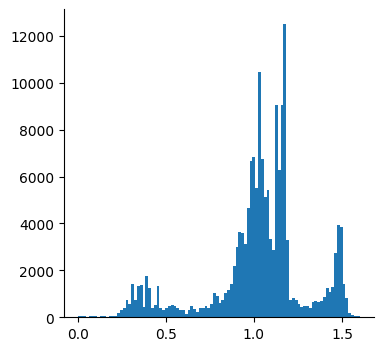

In [96]:
plt.hist(dpt.obs["palantir_pseudotime"], bins=100)

In [104]:
pt=dpt.obs["palantir_pseudotime"]

In [105]:
pt[pt<0.22]=0.22

(array([  811.,   215.,   289.,   486.,   607.,   458.,   767.,  1132.,
          616.,  1340.,  1131.,   587.,  1474.,  1246.,   240.,   462.,
          986.,   876.,   273.,   284.,   348.,   411.,   427.,   454.,
          391.,   371.,   249.,   280.,   139.,   175.,   416.,   378.,
          248.,   188.,   350.,   326.,   444.,   352.,   362.,   598.,
          902.,   773.,   532.,   604.,   752.,   979.,  1044.,  1306.,
         1976.,  2562.,  3008.,  3289.,  2731.,  2963.,  4452.,  6058.,
         5902.,  4565.,  7382.,  8684.,  4320.,  4730.,  4455.,  2771.,
         2477.,  6357.,  7506.,  6557.,  7600., 10578.,  2138.,   604.,
          683.,   691.,   598.,   425.,   397.,   426.,   414.,   321.,
          460.,   681.,   465.,   637.,   586.,   778.,  1095.,   901.,
         1183.,  1137.,  4088.,  2085.,  3620.,  1488.,   740.,   312.,
           88.,    67.,    43.,    51.]),
 array([0.22      , 0.23379696, 0.24759392, 0.26139089, 0.27518785,
        0.28898481, 0.3027

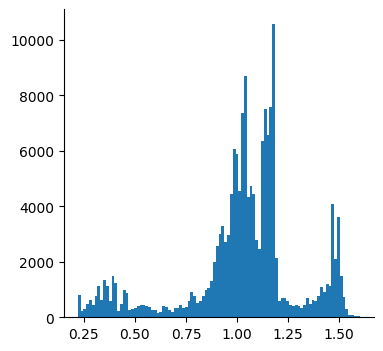

In [106]:
plt.hist(pt,bins=100)

In [107]:
def minmax_normalise(arr):
        
    norm_arr = []
    arr = np.asarray(arr)
    arr_max = np.percentile(arr, 99.5)
    arr_min = np.percentile(arr, 0.5)
    for i in range(len(arr)):
        norm_arr.append((arr[i] - arr_min )/(arr_max  - arr_min )) 
    return norm_arr
    

In [108]:
pt_norm=minmax_normalise(pt)

(array([  811.,   215.,   289.,   486.,   607.,   458.,   767.,  1132.,
          616.,  1340.,  1131.,   587.,  1474.,  1246.,   240.,   462.,
          986.,   876.,   273.,   284.,   348.,   411.,   427.,   454.,
          391.,   371.,   249.,   280.,   139.,   175.,   416.,   378.,
          248.,   188.,   350.,   326.,   444.,   352.,   362.,   598.,
          902.,   773.,   532.,   604.,   752.,   979.,  1044.,  1306.,
         1976.,  2562.,  3008.,  3289.,  2731.,  2963.,  4452.,  6058.,
         5902.,  4565.,  7382.,  8684.,  4320.,  4730.,  4455.,  2771.,
         2477.,  6357.,  7506.,  6557.,  7600., 10578.,  2138.,   604.,
          683.,   691.,   598.,   425.,   397.,   426.,   414.,   321.,
          460.,   681.,   465.,   637.,   586.,   778.,  1095.,   901.,
         1183.,  1137.,  4088.,  2085.,  3620.,  1488.,   740.,   312.,
           88.,    67.,    43.,    51.]),
 array([-0.01227329, -0.00158194,  0.0091094 ,  0.01980075,  0.0304921 ,
         0.04118345, 

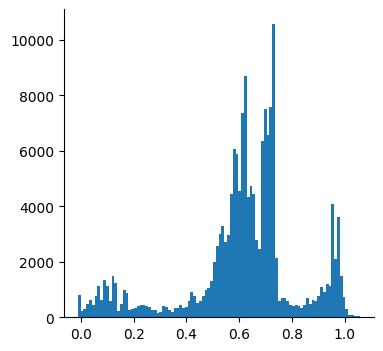

In [109]:
plt.hist(pt_norm,bins=100)

In [126]:
dpt_ob=np.array(pt_norm)[dpt.obs["pseudoStage"]=="Osteoblast stage"]
dpt_preob=np.array(pt_norm)[dpt.obs["pseudoStage"]=="Immediate stage"]
dpt_stem=np.array(pt_norm)[dpt.obs["pseudoStage"]=="Stemcell stage"]

(array([2.000e+00, 3.000e+00, 6.000e+00, 3.000e+00, 2.000e+00, 4.000e+00,
        4.000e+00, 5.000e+00, 0.000e+00, 5.000e+00, 5.000e+00, 9.000e+00,
        1.700e+01, 1.600e+01, 1.700e+01, 2.600e+01, 3.100e+01, 2.100e+01,
        2.300e+01, 4.200e+01, 8.300e+01, 6.900e+01, 8.200e+01, 1.150e+02,
        1.510e+02, 1.220e+02, 1.130e+02, 1.180e+02, 1.710e+02, 2.540e+02,
        3.760e+02, 4.680e+02, 4.270e+02, 3.700e+02, 2.750e+02, 2.340e+02,
        2.860e+02, 2.980e+02, 3.510e+02, 3.790e+02, 4.670e+02, 4.760e+02,
        4.680e+02, 4.720e+02, 5.370e+02, 6.630e+02, 8.210e+02, 1.015e+03,
        1.122e+03, 1.246e+03, 1.283e+03, 1.276e+03, 1.043e+03, 6.930e+02,
        4.980e+02, 3.950e+02, 4.780e+02, 6.860e+02, 5.150e+02, 4.030e+02,
        3.630e+02, 3.860e+02, 3.510e+02, 3.020e+02, 1.950e+02, 1.660e+02,
        2.470e+02, 1.280e+02, 5.600e+01, 8.600e+01, 4.300e+01, 8.800e+01,
        2.400e+01, 2.600e+01, 1.050e+02, 3.400e+01, 2.400e+01, 4.200e+01,
        2.100e+01, 1.900e+01, 4.000e+0

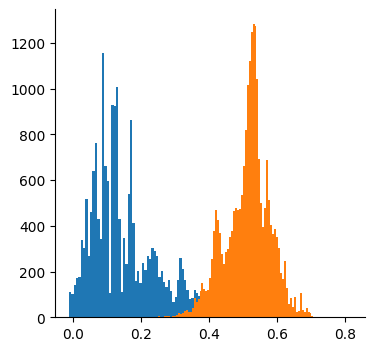

In [129]:
plt.hist(dpt_ob,bins=100)
plt.hist(dpt_preob,bins=100)


In [184]:
def minmax_normalise(arr):
        
    norm_arr = []
    arr = np.asarray(arr)
    arr_max = np.percentile(arr, 99.8)
    arr_min = np.percentile(arr, 0)
    for i in range(len(arr)):
        norm_arr.append((arr[i] - arr_min )/(arr_max  - arr_min )) 
    return np.array(norm_arr)
    
def normStage(arr,start,newstart,end=999,ranges=0.4):
    arr_copy=arr.copy()
    largeLogic=(arr_copy>start)&(arr_copy<end)
    arrLarge=arr_copy[largeLogic]
    arrNew=newstart+minmax_normalise(arrLarge)*ranges
    arr_copy[largeLogic]=arrNew
    return(arr_copy)

(array([ 117.,  187.,  236.,  367.,  505.,  385.,  644.,  943.,  499.,
        1091.,  911.,  476., 1171.,  986.,  210.,  328.,  712.,  664.,
         243.,  258.,  250.,  257.,  274.,  328.,  275.,  278.,  170.,
         203.,  117.,  125.,  285.,  257.,  153.,  103.,  158.,  139.,
         148.,   98.,   79.,   54.,   77.,   94.,   76.,   89.,   65.,
          91.,  166.,  219.,  393.,  608.,  663.,  652.,  320.,  248.,
         357.,  330.,  317.,  392.,  404.,  540.,  323.,  245.,  163.,
         224.,  164.,  207.,  200.,  151.,  175.,  134.,  124.,  200.,
         254.,  336.,  288.,  218.,  199.,  252.,  190.,  147.,  282.,
         437.,  218.,  260.,  302.,  262.,  229.,  271.,  157.,  105.,
         103.,   42.,   26.,   19.,   26.,   21.,   20.,   13.,   29.,
          33.]),
 array([-0.01227329, -0.0015834 ,  0.0091065 ,  0.01979639,  0.03048629,
         0.04117618,  0.05186608,  0.06255598,  0.07324587,  0.08393577,
         0.09462566,  0.10531556,  0.11600545,  0.126695

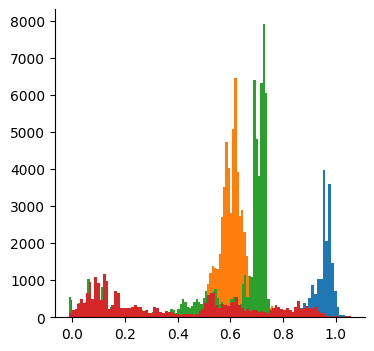

In [133]:
pt_norm=np.array(pt_norm)
chondro_dpt=pt_norm[lineage["lineage_chondro"]]
mes_dpt=pt_norm[lineage["lineage_mesenchyme"]]
lepr_dpt=pt_norm[lineage["lineage_lepr"]]
fa_dpt=pt_norm[lineage["lineage_laFibro"]]
plt.hist(chondro_dpt, bins=100, label='chondro_dpt')
plt.hist(mes_dpt, bins=100)
plt.hist(lepr_dpt, bins=100)
plt.hist(fa_dpt, bins=100)

In [145]:
arr_copy=mes_dpt.copy()
largeLogic=arr_copy>0.6
arrLarge=arr_copy[largeLogic]

In [150]:
np.array(minmax_normalise(arrLarge))*0.4

array([0.01305344, 0.03390129, 0.06633338, ..., 0.14515591, 0.13569518,
       0.14298035])

In [162]:

arrNew=0.8+minmax_normalise(arrLarge)*0.4


In [163]:
arrNew

array([0.81305344, 0.83390129, 0.86633338, ..., 0.94515591, 0.93569518,
       0.94298035])

In [174]:
mes_dpt_test=normStage(mes_dpt,0.6,0.8,ranges=0.4)
mes_dpt_test=normStage(mes_dpt_test,start=0.4,newstart=0.4,end=0.8,ranges=0.4)

(array([ 578.,  225.,  238.,  490.,  634.,  539., 1092.,  601., 1184.,
         741., 1127., 1249.,  374.,  357.,  736.,  670.,  279.,  281.,
         244.,  276.,  361.,  277.,  252.,  152.,  195.,  101.,  239.,
         288.,  208.,  127.,  230.,  191.,  322.,  173.,  154.,  205.,
         289.,  365.,  328.,  249.,  169.,  167.,  189.,  232.,  281.,
         340.,  329.,  292.,  252.,  262.,  361.,  464.,  488.,  415.,
         431.,  426.,  467.,  551.,  456.,  284.,  251.,  291.,  259.,
         131.,  176.,  160.,   93.,  229.,  275.,  278.,  264.,  192.,
         120.,   98.,  111.,  129.,  202.,  315.,  522.,  760.,  415.,
         275.,  253.,  556.,  597.,  200.,  686., 2171., 3846., 2902.,
        2200., 1240., 1647., 6233.,  467., 3698., 3902., 4685., 2264.,
         759.]),
 array([-1.22732934e-02, -1.50560420e-04,  1.19721725e-02,  2.40949054e-02,
         3.62176384e-02,  4.83403713e-02,  6.04631042e-02,  7.25858372e-02,
         8.47085701e-02,  9.68313030e-02,  1.08954

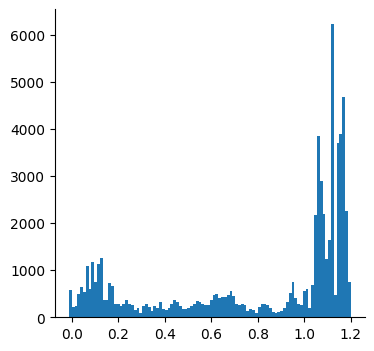

In [190]:
lepr_dpt_new=normStage(lepr_dpt,0.6,0.8,ranges=0.4)
lepr_dpt_new=normStage(lepr_dpt_new,start=0.4,newstart=0.4,end=0.8,ranges=0.4)
lepr_dpt_new[lepr_dpt_new>1.2]=1.2
plt.hist(lepr_dpt_new,bins=100)

(array([ 131.,  226.,  235.,  491.,  633.,  538., 1094.,  603., 1197.,
         748., 1136., 1260.,  379.,  364.,  753.,  688.,  291.,  289.,
         267.,  286.,  380.,  317.,  313.,  188.,  211.,  109.,  248.,
         309.,  205.,  123.,  185.,  144.,  166.,   80.,   49.,   26.,
          44.,   44.,   46.,   54.,   47.,   44.,   60.,   30.,   37.,
          47.,   55.,   85.,   98.,  133.,  117.,  215.,  291.,  349.,
         413.,  370.,  401.,  306.,  192.,  124.,  135.,  195.,  201.,
         194.,  181.,  162.,  210.,  509.,  656.,  435.,  288.,  223.,
         244.,  264.,  223.,  220.,  176.,  180.,  284.,  418.,  357.,
         252.,  298.,  264.,  230.,  484.,  334.,  336.,  411.,  255.,
         348.,  183.,  118.,  111.,   32.,   21.,   35.,   27.,   18.,
          58.]),
 array([-1.22732934e-02, -1.50560420e-04,  1.19721725e-02,  2.40949054e-02,
         3.62176384e-02,  4.83403713e-02,  6.04631042e-02,  7.25858372e-02,
         8.47085701e-02,  9.68313030e-02,  1.08954

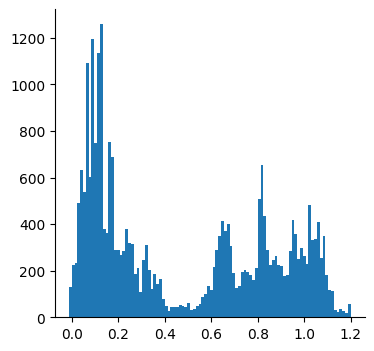

In [191]:
fa_dpt_new=normStage(fa_dpt,0.6,0.8,ranges=0.4)
fa_dpt_new=normStage(fa_dpt_new,start=0.4,newstart=0.4,end=0.8,ranges=0.4)
fa_dpt_new[fa_dpt_new>1.2]=1.2
plt.hist(fa_dpt_new,bins=100)

(array([ 242.,   37.,   45.,  144.,  119.,  110.,  217.,  130.,  273.,
         190.,  246.,  368.,   71.,  137.,  278.,  219.,   33.,   43.,
         141.,  179.,  155.,  130.,   96.,   85.,   60.,   26.,   92.,
         141.,   86.,   61.,  115.,  139.,  129.,  146.,   66.,   77.,
         125.,  143.,  116.,  115.,   99.,   82.,   91.,   79.,  102.,
         133.,  154.,  189.,  226.,  294.,  318.,  394.,  529.,  648.,
         808.,  947., 1012.,  904.,  857., 1050., 1239., 1771., 2130.,
        2702., 3402., 3120., 2475., 2169., 3534., 3934., 5641., 2592.,
        2146., 2166., 2133., 1633., 1266.,  920.,  703.,  664.,  528.,
         394.,  264.,  221.,  142.,   76.,  125.,  158.,  139.,  193.,
         237.,  202.,  184.,  145.,  118.,   82.,   45.,   24.,   13.,
          75.]),
 array([-1.22732934e-02, -1.50560420e-04,  1.19721725e-02,  2.40949054e-02,
         3.62176384e-02,  4.83403713e-02,  6.04631042e-02,  7.25858372e-02,
         8.47085701e-02,  9.68313030e-02,  1.08954

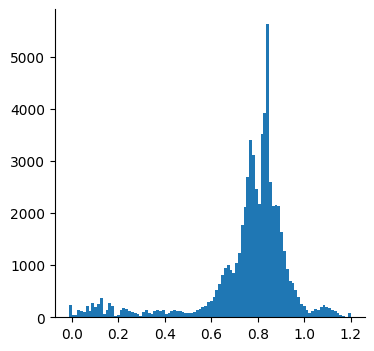

In [192]:
mes_dpt_new=normStage(mes_dpt,0.6,0.8,ranges=0.4)
mes_dpt_new=normStage(mes_dpt_new,start=0.4,newstart=0.4,end=0.8,ranges=0.4)
mes_dpt_new[mes_dpt_new>1.2]=1.2
plt.hist(mes_dpt_new,bins=100)

(array([4.710e+02, 3.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        9.000e+00, 6.000e+00, 1.000e+01, 1.100e+01, 2.000e+00, 3.000e+00,
        2.400e+01, 4.800e+01, 3.700e+01, 1.600e+01, 6.000e+00, 9.000e+00,
        1.700e+01, 1.600e+01, 1.100e+01, 1.400e+01, 2.200e+01, 3.000e+01,
        2.000e+01, 1.700e+01, 1.600e+01, 1.400e+01, 1.500e+01, 1.400e+01,
        1.600e+01, 2.200e+01, 2.700e+01, 3.300e+01, 5.200e+01, 5.300e+01,
        6.300e+01, 7.400e+01, 5.000e+01, 6.200e+01, 7.900e+01, 6.300e+01,
        4.900e+01, 1.380e+02, 8.300e+01, 7.100e+01, 1.530e+02, 1.270e+02,
        1.130e+02, 1.490e+02, 1.570e+02, 5.500e+01, 6.900e+01, 9.200e+01,
        1.240e+02, 1.030e+02, 1.480e+02, 1.240e+02, 8.000e+01, 4.800e+01,
        1.010e+02, 8.800e+01, 1.340e+02, 1.270e+02, 1.650e+02, 1.560e+02,
        1.990e+02, 1.470e+02, 1.670e+0

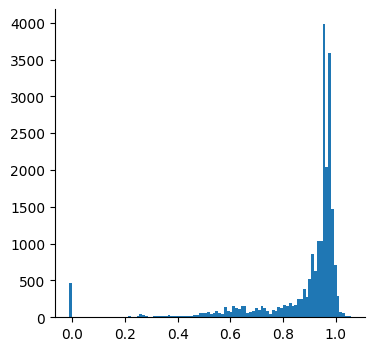

In [194]:
plt.hist(chondro_dpt,bins=100)

(array([4.710e+02, 3.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 5.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+01, 7.000e+00,
        1.500e+01, 5.000e+00, 4.000e+00, 2.300e+01, 5.700e+01, 3.500e+01,
        1.200e+01, 8.000e+00, 1.500e+01, 2.200e+01, 9.000e+00, 1.700e+01,
        2.700e+01, 3.100e+01, 2.200e+01, 1.700e+01, 1.200e+01, 8.000e+00,
        5.000e+00, 1.100e+01, 8.000e+00, 7.000e+00, 1.000e+01, 1.100e+01,
        1.100e+01, 1.500e+01, 1.400e+01, 1.300e+01, 2.200e+01, 2.700e+01,
        2.900e+01, 1.900e+01, 4.500e+01, 3.700e+01, 3.800e+01, 4.500e+01,
        2.700e+01, 2.700e+01, 3.800e+01, 3.400e+01, 4.000e+01, 5.100e+01,
        3.000e+01, 3.100e+01, 2.500e+01, 5.400e+01, 9.500e+01, 4.900e+01,
        4.200e+01, 1.270e+02, 1.700e+02, 1.400e+02, 1.740e+02, 1.690e+02,
        6.400e+01, 1.070e+02, 1.480e+02, 1.310e+02, 1.750e+02, 1.200e+02,
        6.400e+01, 1.180e+02, 1.440e+0

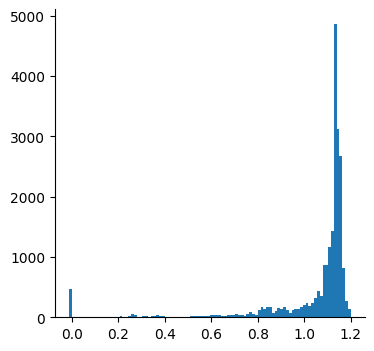

In [193]:
chondro_dpt_new=normStage(chondro_dpt,0.6,0.8,ranges=0.4)
chondro_dpt_new=normStage(chondro_dpt_new,start=0.4,newstart=0.4,end=0.8,ranges=0.4)
chondro_dpt_new[chondro_dpt_new>1.2]=1.2
plt.hist(chondro_dpt_new,bins=100)

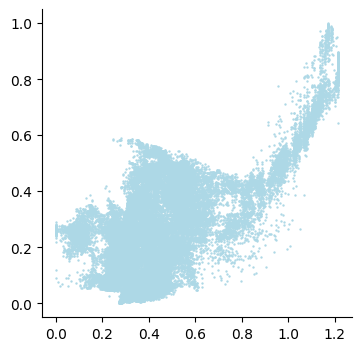

In [203]:
plt.scatter(x=1.2-mes_dpt_new,y=pr_res.pseudotime,s=0.5,c="lightblue")

(array([ 257.,  665., 1012., 1326., 2369., 3816., 4316., 4509., 3281.,
        3132., 2054., 1558., 1600., 1057.,  984.,  953.,  947.,  775.,
         920.,  725.,  719.,  763.,  769.,  951.,  881., 1165.,  901.,
        1073.,  844.,  513.,  616.,  648.,  608.,  446.,  574.,  542.,
         614.,  379.,  804.,  552.,  838.,  967.,  781., 1000., 1008.,
         851., 1133., 1163.,  627.,  526.,  345.,  306.,  355.,  297.,
         231.,  208.,  169.,  175.,  149.,  116.,  128.,  133.,  114.,
         132.,   97.,   85.,   95.,   96.,   89.,  103.,   96.,   62.,
          76.,   41.,   70.,   45.,   41.,   48.,   37.,   42.,   29.,
          18.,   32.,   30.,   29.,   27.,   21.,   22.,   27.,   23.,
          16.,   17.,   20.,   12.,   19.,   43.,   26.,   16.,   16.,
          10.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29

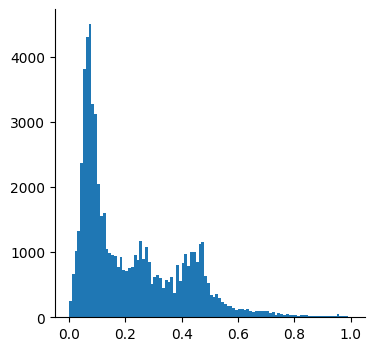

In [205]:
plt.hist(new_mes,bins=100)

In [206]:
dpt.obs["pseudotime_norm"]=0
dpt.obs["pseudotime_norm"][lineage['lineage_mesenchyme']]=1.2-mes_dpt_new
dpt.obs["pseudotime_norm"][lineage['lineage_chondro']]=1.2-chondro_dpt_new
dpt.obs["pseudotime_norm"][lineage['lineage_laFibro']]=1.2-fa_dpt_new
dpt.obs["pseudotime_norm"][lineage['lineage_lepr']]=1.2-lepr_dpt_new

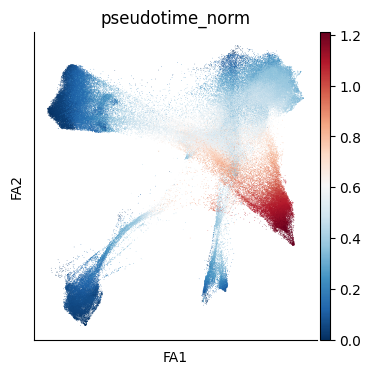

In [208]:
sc.pl.draw_graph(dpt,color="pseudotime_norm",cmap="RdBu_r")

(array([2.300e+01, 1.700e+01, 1.020e+02, 2.810e+02, 8.370e+02, 3.197e+03,
        2.790e+03, 4.947e+03, 1.235e+03, 1.179e+03, 9.340e+02, 7.620e+02,
        3.730e+02, 3.970e+02, 3.400e+02, 2.190e+02, 1.940e+02, 2.290e+02,
        2.300e+02, 1.450e+02, 1.540e+02, 1.130e+02, 9.600e+01, 8.300e+01,
        1.480e+02, 1.850e+02, 1.290e+02, 1.330e+02, 8.200e+01, 1.060e+02,
        1.790e+02, 1.650e+02, 1.520e+02, 1.690e+02, 9.000e+01, 1.640e+02,
        6.800e+01, 8.900e+01, 8.800e+01, 6.000e+01, 9.200e+01, 8.100e+01,
        6.000e+01, 5.100e+01, 3.400e+01, 2.400e+01, 1.900e+01, 2.100e+01,
        1.500e+01, 1.900e+01, 2.200e+01, 3.700e+01, 2.700e+01, 1.800e+01,
        1.300e+01, 2.200e+01, 1.400e+01, 7.000e+00, 2.200e+01, 6.800e+01,
        3.100e+01, 7.000e+00, 5.000e+00, 1.600e+01, 6.000e+00, 1.000e+01,
        2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        5.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 3.000e+0

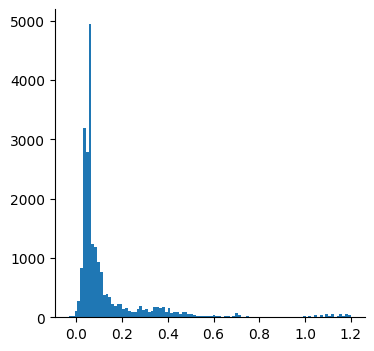

In [198]:
plt.hist(dpt.obs["palantir_norm"].loc[lineage["lineage_chondro"]],bins=100)

In [159]:
normStage(mes_dpt,0.6,0.8,ranges=0.4)

array([0.81305344, 0.30467304, 0.27363762, ..., 0.94298035, 0.5837722 ,
       0.58440912])

In [210]:
npr=adata.obs["new_palantir_raw"]

In [211]:
adata.obs["pseudoStage"]="Stemcell stage"
adata.obs["pseudoStage"][adata.obs["C19_named"]=="Ob"]="Osteoblast stage"
adata.obs["pseudoStage"][adata.obs["C19_named"]=="Pre-ob"]="Immediate stage"

(array([ 257.,  665., 1012., 1326., 2369., 3816., 4316., 4509., 3281.,
        3132., 2054., 1558., 1600., 1057.,  984.,  953.,  947.,  775.,
         920.,  725.,  719.,  763.,  769.,  951.,  881., 1165.,  901.,
        1073.,  844.,  513.,  616.,  648.,  608.,  446.,  574.,  542.,
         614.,  379.,  804.,  552.,  838.,  967.,  781., 1000., 1008.,
         851., 1133., 1163.,  627.,  526.,  345.,  306.,  355.,  297.,
         231.,  208.,  169.,  175.,  149.,  116.,  128.,  133.,  114.,
         132.,   97.,   85.,   95.,   96.,   89.,  103.,   96.,   62.,
          76.,   41.,   70.,   45.,   41.,   48.,   37.,   42.,   29.,
          18.,   32.,   30.,   29.,   27.,   21.,   22.,   27.,   23.,
          16.,   17.,   20.,   12.,   19.,   43.,   26.,   16.,   16.,
          10.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29

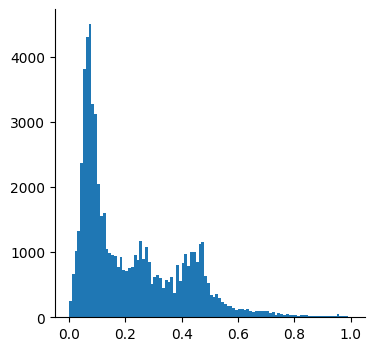

In [221]:
plt.hist(npr,bins=100)

(array([1.380e+02, 6.080e+02, 1.032e+03, 8.100e+02, 1.803e+03, 2.728e+03,
        3.535e+03, 3.688e+03, 4.412e+03, 2.750e+03, 2.986e+03, 2.151e+03,
        1.303e+03, 1.331e+03, 1.122e+03, 9.190e+02, 8.040e+02, 8.210e+02,
        7.860e+02, 5.220e+02, 7.310e+02, 5.190e+02, 4.530e+02, 5.270e+02,
        6.390e+02, 5.610e+02, 5.860e+02, 6.060e+02, 8.080e+02, 5.580e+02,
        8.680e+02, 4.510e+02, 3.680e+02, 3.830e+02, 2.480e+02, 3.570e+02,
        3.050e+02, 2.630e+02, 3.390e+02, 2.380e+02, 3.680e+02, 2.030e+02,
        3.420e+02, 3.440e+02, 2.490e+02, 4.800e+02, 4.780e+02, 2.920e+02,
        5.020e+02, 4.230e+02, 4.430e+02, 5.300e+02, 5.010e+02, 3.520e+02,
        1.000e+02, 9.600e+01, 1.700e+01, 5.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+0

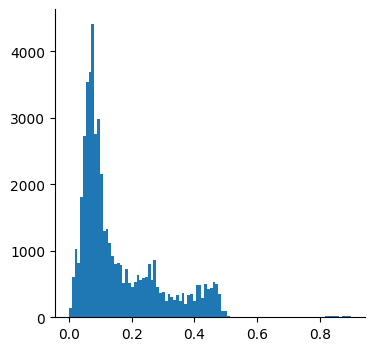

In [213]:
plt.hist(npr[adata.obs["pseudoStage"]=="Stemcell stage"],bins=100)

(array([  1.,   1.,   0.,   1.,   2.,   1.,   0.,   2.,   0.,   2.,   0.,
          1.,   1.,   1.,   0.,   3.,   3.,   6.,   1.,   4.,   2.,   6.,
          5.,   7.,   4.,  13.,  10.,   5.,   9.,  18.,  21.,  17.,  21.,
         41.,  63.,  91.,  43.,  84., 100.,  60.,  60.,  82.,  60.,  79.,
         60.,  78.,  91.,  62., 121.,  88., 108., 117., 113.,  89., 142.,
         99., 121., 124.,  82., 122., 132.,  81.,  85.,  81.,  76.,  84.,
         97.,  94.,  72.,  59.,  60.,  47.,  51.,  43.,  29.,  40.,  36.,
         27.,  15.,  17.,   6.,   9.,   8.,   9.,   7.,   9.,   9.,   9.,
          9.,  14.,  13.,  23.,  11.,  13.,  27.,  36.,  22.,  14.,  14.,
          9.]),
 array([0.07863155, 0.08784524, 0.09705892, 0.10627261, 0.11548629,
        0.12469998, 0.13391366, 0.14312734, 0.15234103, 0.16155471,
        0.1707684 , 0.17998208, 0.18919577, 0.19840945, 0.20762314,
        0.21683682, 0.2260505 , 0.23526419, 0.24447787, 0.25369156,
        0.26290524, 0.27211893, 0.28133261, 0.

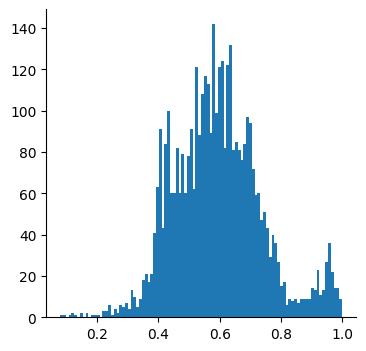

In [214]:
plt.hist(npr[adata.obs["pseudoStage"]=="Osteoblast stage"],bins=100)

(array([  1.,   0.,   1.,   0.,   3.,   0.,   3.,   1.,   3.,   8.,   6.,
          0.,   2.,   3.,   4.,   9.,   5.,  11.,  19.,  23.,  34.,  50.,
         42.,  34., 104.,  70.,  90., 100.,  68., 113.,  47., 118.,  77.,
        160., 115.,  94., 100., 115., 157., 172., 144., 115., 106., 148.,
        155., 101., 133., 125., 101., 153.,  89., 118., 101.,  93.,  78.,
        142., 127., 108.,  91., 124.,  65., 155., 136.,  92., 157., 144.,
        239., 178., 152., 157., 212., 183., 244., 259., 212., 171., 195.,
        247., 417., 204., 142., 173., 152., 178., 119., 146.,  97., 114.,
        143., 116.,  82.,  86.,  38.,  49.,  45.,  29.,  33.,  15.,  21.,
          4.]),
 array([0.04650946, 0.05194167, 0.05737389, 0.0628061 , 0.06823832,
        0.07367054, 0.07910275, 0.08453497, 0.08996718, 0.0953994 ,
        0.10083161, 0.10626383, 0.11169605, 0.11712826, 0.12256048,
        0.12799269, 0.13342491, 0.13885713, 0.14428934, 0.14972156,
        0.15515377, 0.16058599, 0.1660182 , 0.

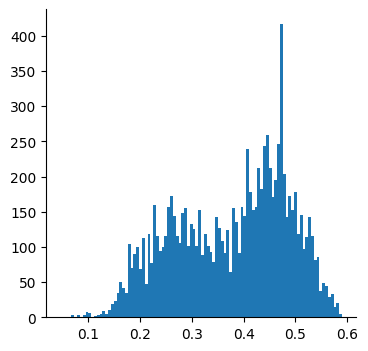

In [215]:
plt.hist(npr[adata.obs["pseudoStage"]=="Immediate stage"],bins=100)

(array([  48.,  356.,  324.,  460.,  343.,  575.,  694., 1373., 1420.,
        1845., 2037., 1879., 1873., 1623.,  945.,  978.,  925.,  655.,
         448.,  380.,  390.,  424.,  280.,  338.,  289.,  284.,  306.,
         305.,  373.,  251.,  309.,  322.,  293.,  248.,  247.,  268.,
         267.,  452.,  182.,  448.,  333.,  292.,  415.,  445.,  387.,
         282.,  499.,   85.,  275.,  184.,  115.,  189.,  154.,  134.,
         164.,  163.,   88.,  152.,  137.,  175.,   94.,  125.,  171.,
          59.,  129.,  143.,  104.,   71.,   67.,  129.,  128.,   68.,
          48.,   67.,   82.,  104.,   68.,  107.,  179.,  176.,  139.,
         105.,   49.,   18.,   38.,   14.,   20.,    8.,    6.,   23.,
          16.,   20.,   10.,   10.,   28.,   25.,   38.,   19.,   25.,
           5.]),
 array([0.        , 0.00589731, 0.01179462, 0.01769193, 0.02358924,
        0.02948655, 0.03538386, 0.04128117, 0.04717848, 0.05307579,
        0.0589731 , 0.06487041, 0.07076772, 0.07666504, 0.08256235

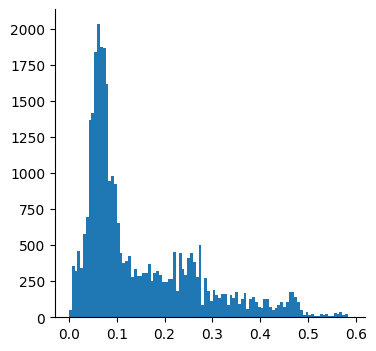

In [220]:
plt.hist(npr[mes_dpt_new>0.8],bins=100)

In [354]:
mes_dpt_npr=normStage(npr,0.5,0.8,ranges=0.4)
mes_dpt_npr=normStage(mes_dpt_npr,start=0.25,newstart=0.4,end=0.8,ranges=0.4)
mes_dpt_npr=normStage(mes_dpt_npr,start=0,newstart=0,end=0.4,ranges=0.4)

(array([ 123.,  508.,  645.,  683.,  882., 1678., 2087., 2944., 3285.,
        3186., 3471., 2182., 2542., 1691., 1302., 1175., 1330.,  797.,
         786.,  716.,  749.,  651.,  751.,  562.,  665.,  556.,  587.,
         511.,  471.,  679.,  759.,  643.,  545.,  879.,  832.,  725.,
         876.,  637.,  428.,  481.,  435.,  494.,  406.,  463.,  326.,
         373.,  501.,  404.,  455.,  288.,  506.,  486.,  467.,  558.,
         800.,  631.,  599.,  721.,  780.,  731.,  634.,  858.,  964.,
         678.,  428.,  381.,  576.,  405.,  498.,  328.,  262.,  258.,
         171.,  191.,  182.,  177.,  136.,  125.,  143.,  152.,  118.,
          94.,   91.,   61.,   66.,   65.,   52.,   30.,   43.,   46.,
          37.,   30.,   42.,   21.,   32.,   20.,   38.,   47.,   24.,
          18.]),
 array([0.        , 0.01207783, 0.02415566, 0.03623349, 0.04831132,
        0.06038916, 0.07246699, 0.08454482, 0.09662265, 0.10870048,
        0.12077831, 0.13285614, 0.14493397, 0.1570118 , 0.16908963

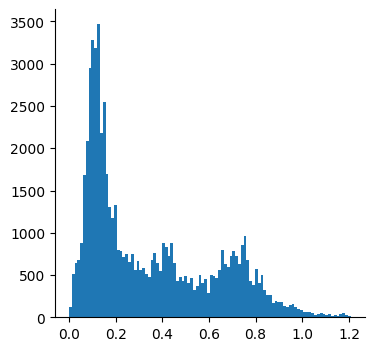

In [355]:
plt.hist(mes_dpt_npr,bins=100)

In [356]:
mes.obs["npr"]=mes_dpt_npr

In [1]:
mes

NameError: name 'mes' is not defined

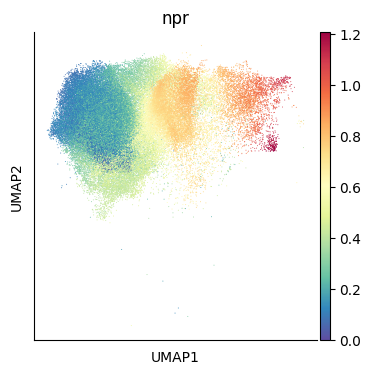

In [357]:
sc.pl.umap(mes,color="npr")

In [222]:
new_dpt=minmax_normalise(npr[mes_dpt_new>0.8]) * 0.4

In [225]:
mes_dpt=1.2-mes_dpt_new

In [226]:
mes_dpt[mes_dpt_new>0.8]=new_dpt

(array([ 723., 1374., 3044., 5888., 4405., 2572., 1352., 1055.,  863.,
         996.,  830.,  763.,  966.,  952., 1086., 1166.,  542.,  423.,
         524.,  374.,  393.,  312.,  389.,  270.,  200.,  252.,  352.,
         414.,  110.,   43.,   44.,   39.,   84., 2538., 3123., 3402.,
        2702., 2130., 1771., 1239., 1050.,  857.,  904., 1012.,  947.,
         808.,  648.,  529.,  394.,  318.,  294.,  226.,  189.,  154.,
         133.,  102.,   79.,   91.,   82.,   99.,  115.,  116.,  143.,
         125.,   77.,   66.,  146.,  129.,  139.,  115.,   61.,   86.,
         141.,   92.,   26.,   60.,   85.,   96.,  130.,  155.,  179.,
         141.,   43.,   33.,  219.,  278.,  137.,   71.,  368.,  246.,
         190.,  273.,  130.,  217.,  110.,  119.,  144.,   45.,   37.,
         242.]),
 array([0.        , 0.01212273, 0.02424547, 0.0363682 , 0.04849093,
        0.06061366, 0.0727364 , 0.08485913, 0.09698186, 0.1091046 ,
        0.12122733, 0.13335006, 0.1454728 , 0.15759553, 0.16971826

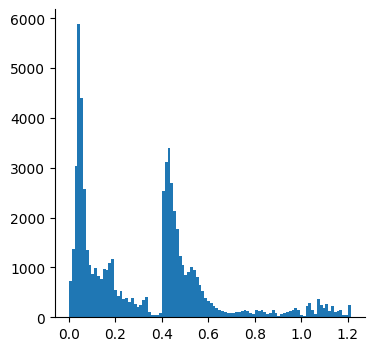

In [227]:
plt.hist(mes_dpt,bins=100)

In [230]:
adata.obs["dpt_before"]=1.2-mes_dpt_new

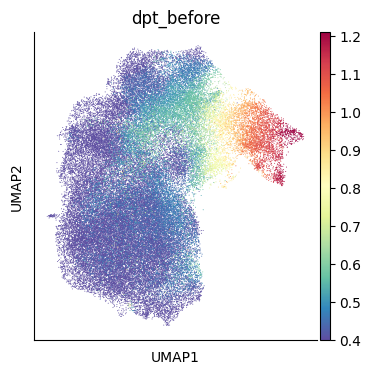

In [232]:
sc.pl.umap(adata,color=["dpt_before"],vmin=0.4)

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


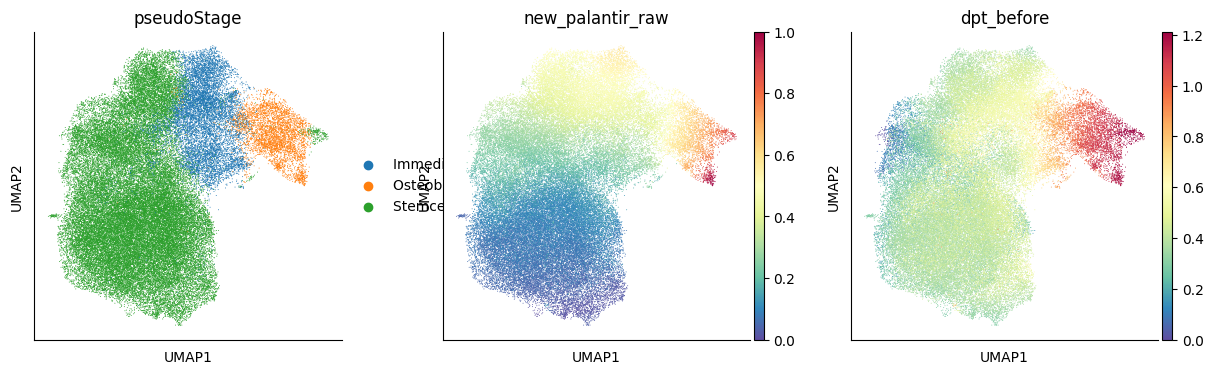

In [231]:
sc.pl.umap(adata,color=["pseudoStage","new_palantir_raw","dpt_before"])

In [233]:
mes=dpt[lineage["lineage_mesenchyme"]]

In [234]:
mes.obs["new_palantir_raw"]=adata.obs["new_palantir_raw"]

/tmp/ipykernel_2660017/3622206435.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  mes.obs["new_palantir_raw"]=adata.obs["new_palantir_raw"]


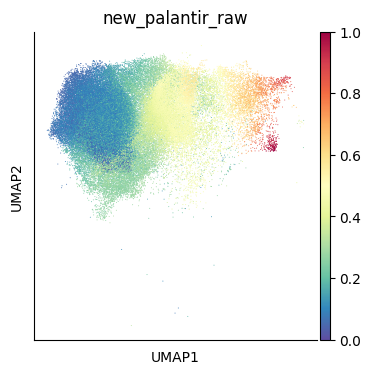

In [235]:
sc.pl.umap(mes,color=["new_palantir_raw"])

In [237]:
pr_res2 = palantir.core.run_palantir(
    mes, startCell.index[0], num_waypoints=500, terminal_states=endCell
)

Sampling and flocking waypoints...
Time for determining waypoints: 0.05369080305099487 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 3.946381107966105 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9953
Correlation at iteration 2: 0.9999
Correlation at iteration 3: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [238]:
adata.obs["new_palantir_raw2"]=pr_res2.pseudotime

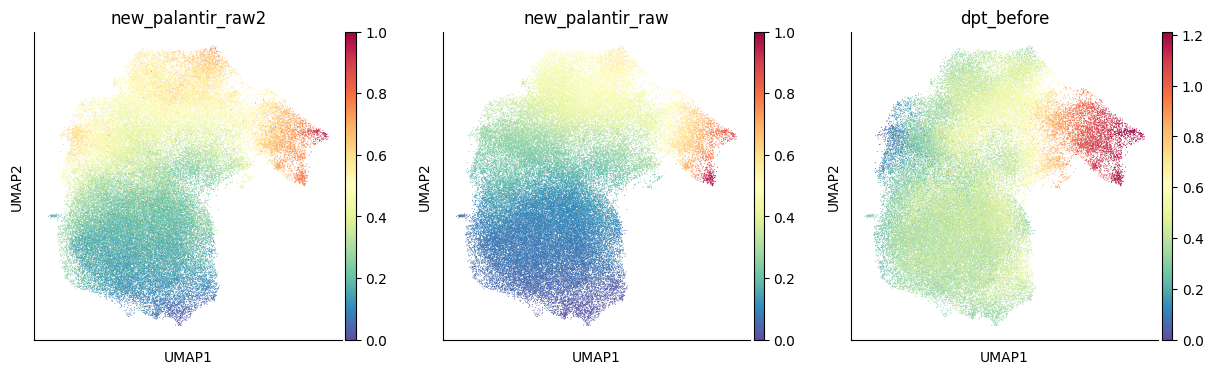

In [241]:
sc.pl.umap(adata,color=["new_palantir_raw2","new_palantir_raw","dpt_before"])

(array([  32.,   52.,   20.,  222.,  228.,  234.,  263.,  427.,  655.,
         517.,  882., 1675., 3345., 1308., 1663., 2214., 3808., 2586.,
        1745., 1549., 1323., 1095., 1601., 1614.,  987.,  761.,  986.,
         907.,  859.,  723.,  818.,  707.,  543.,  499.,  556.,  720.,
         838.,  804.,  774.,  740.,  875.,  868.,  839.,  880.,  997.,
         817.,  788., 1021., 1125., 1341., 1454., 1296.,  994., 1054.,
         836.,  785.,  839.,  837.,  519.,  474.,  346.,  333.,  274.,
         317.,  251.,  257.,  168.,  193.,  138.,  310.,  180.,  146.,
         137.,  149.,  103.,  155.,   93.,   75.,   98.,   45.,   24.,
          24.,   13.,   21.,   17.,   12.,   11.,   12.,   12.,   22.,
          11.,   17.,   10.,    8.,   10.,    7.,   11.,    7.,    4.,
           6.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29

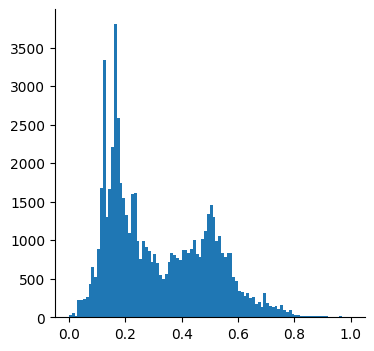

In [243]:
plt.hist(adata.obs["new_palantir_raw2"],bins=100)

In [247]:
mes.obs["new_palantir_raw2"]=pr_res2.pseudotime

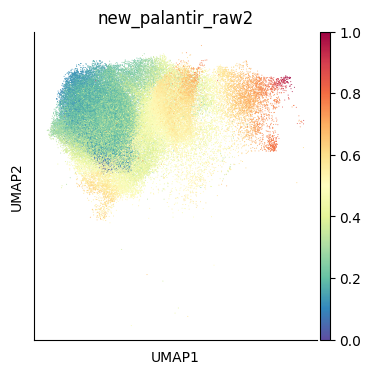

In [248]:
sc.pl.umap(mes,color=["new_palantir_raw2"])

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


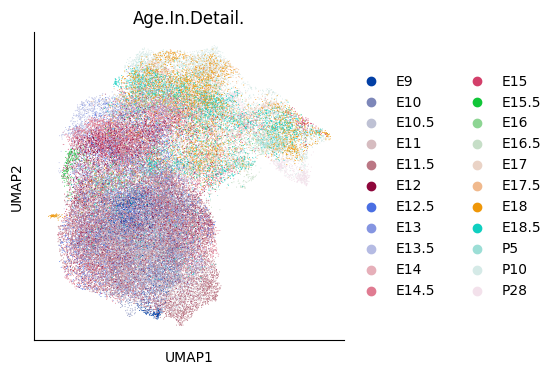

In [246]:
sc.pl.umap(adata,color=["Age.In.Detail."])

In [250]:
mes_pt2=pr_res2.pseudotime

(array([  2.,   0.,   2.,   0.,   2.,   7.,   2.,   1.,   2.,   4.,  10.,
         25.,  34.,  30.,  78., 120.,  67.,  78.,  64.,  66.,  94., 117.,
        127., 141., 142., 110., 145., 131., 117., 103.,  97., 105., 123.,
        156., 195., 179., 140., 121., 100., 109., 124., 158., 179., 180.,
        214., 175., 179., 185., 147., 186., 174., 200., 190., 242., 294.,
        288., 291., 224., 201., 233., 311., 248., 171., 161., 162., 205.,
        210., 194., 115., 114.,  88.,  62.,  77.,  88.,  63.,  37.,  40.,
         70.,  76.,  22.,  14.,  39.,  20.,   7.,  31.,   8.,   9.,  10.,
         15.,   2.,   9.,   8.,   5.,   4.,   2.,   2.,   1.,   3.,   1.,
          1.]),
 array([0.1244901 , 0.13125585, 0.13802161, 0.14478736, 0.15155311,
        0.15831886, 0.16508462, 0.17185037, 0.17861612, 0.18538187,
        0.19214763, 0.19891338, 0.20567913, 0.21244488, 0.21921064,
        0.22597639, 0.23274214, 0.23950789, 0.24627365, 0.2530394 ,
        0.25980515, 0.2665709 , 0.27333666, 0.

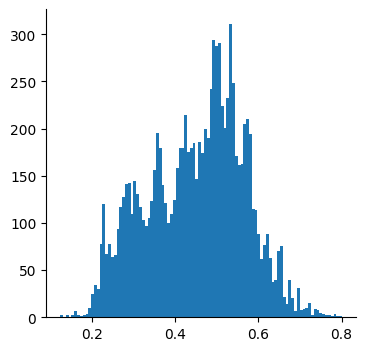

In [251]:
plt.hist(mes_pt2[adata.obs["pseudoStage"]=="Immediate stage"],bins=100)

(array([3.200e+01, 5.200e+01, 2.000e+01, 2.220e+02, 2.280e+02, 2.340e+02,
        2.630e+02, 4.270e+02, 6.550e+02, 5.170e+02, 8.820e+02, 1.675e+03,
        3.343e+03, 1.307e+03, 1.662e+03, 2.212e+03, 3.799e+03, 2.585e+03,
        1.740e+03, 1.536e+03, 1.278e+03, 1.049e+03, 1.457e+03, 1.491e+03,
        8.740e+02, 6.620e+02, 8.470e+02, 7.150e+02, 6.640e+02, 5.310e+02,
        6.060e+02, 5.280e+02, 3.900e+02, 3.460e+02, 3.830e+02, 4.460e+02,
        5.700e+02, 6.140e+02, 6.060e+02, 5.720e+02, 6.320e+02, 5.820e+02,
        5.230e+02, 6.090e+02, 6.960e+02, 5.280e+02, 4.760e+02, 6.780e+02,
        7.140e+02, 8.510e+02, 9.580e+02, 9.210e+02, 6.090e+02, 5.080e+02,
        3.950e+02, 4.340e+02, 4.640e+02, 4.050e+02, 2.190e+02, 1.840e+02,
        1.130e+02, 7.000e+01, 6.400e+01, 4.800e+01, 1.900e+01, 1.600e+01,
        4.000e+00, 6.000e+00, 1.000e+00, 2.000e+00, 5.000e+00, 4.000e+00,
        6.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 6.000e+00,
        2.000e+00, 0.000e+00, 6.000e+0

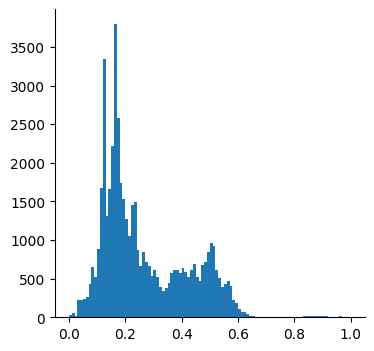

In [252]:
plt.hist(mes_pt2[adata.obs["pseudoStage"]=="Stemcell stage"],bins=100)

(array([  1.,   1.,   0.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,
          0.,   1.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          2.,   0.,   1.,   3.,   6.,   5.,   0.,   4.,  10.,   6.,  18.,
          5.,   7.,   5.,  19.,  31.,  31.,  27.,  36.,  27.,  57.,  45.,
         52.,  32.,  36.,  45.,  33.,  28.,  57., 109.,  81.,  82.,  76.,
         42.,  65.,  85.,  56.,  70.,  82.,  92., 106.,  77.,  63.,  44.,
        135., 195.,  22.,  34., 207.,  34., 106.,  72.,  76., 214.,  83.,
        137.,  54., 116.,  45.,  93., 107.,  54.,  59.,  96.,  54.,  58.,
         35.,  63.,  46.,  27.,  11.,  11.,   8.,   6.,   8.,   4.,   6.,
          1.]),
 array([0.20855223, 0.2149721 , 0.22139197, 0.22781184, 0.2342317 ,
        0.24065157, 0.24707144, 0.25349131, 0.25991118, 0.26633104,
        0.27275091, 0.27917078, 0.28559065, 0.29201052, 0.29843038,
        0.30485025, 0.31127012, 0.31768999, 0.32410986, 0.33052972,
        0.33694959, 0.34336946, 0.34978933, 0.

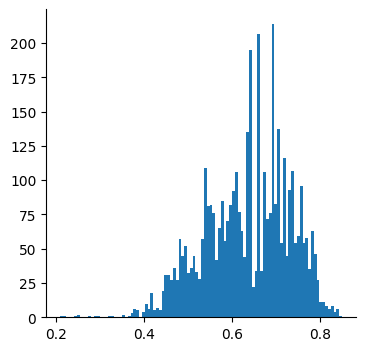

In [254]:
plt.hist(mes_pt2[adata.obs["pseudoStage"]=="Osteoblast stage"],bins=100)

(array([  32.,   52.,   20.,  222.,  228.,  234.,  263.,  427.,  655.,
         517.,  882., 1675., 3345., 1308., 1663., 2214., 3808., 2586.,
        1745., 1549., 1323., 1095., 1601., 1614.,  987.,  761.,  986.,
         907.,  859.,  723.,  818.,  707.,  543.,  499.,  556.,  720.,
         838.,  804.,  774.,  740.,  875.,  868.,  839.,  880.,  997.,
         817.,  788., 1021., 1125., 1341., 1454., 1296.,  994., 1054.,
         836.,  785.,  839.,  837.,  519.,  474.,  346.,  333.,  274.,
         317.,  251.,  257.,  168.,  193.,  138.,  310.,  180.,  146.,
         137.,  149.,  103.,  155.,   93.,   75.,   98.,   45.,   24.,
          24.,   13.,   21.,   17.,   12.,   11.,   12.,   12.,   22.,
          11.,   17.,   10.,    8.,   10.,    7.,   11.,    7.,    4.,
           6.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29

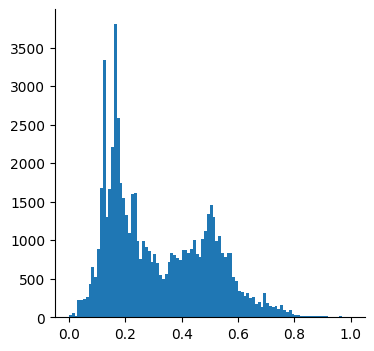

In [253]:
plt.hist(mes_pt2,bins=100)

In [257]:
lepr.obsm["X_pca"]=lepr.obsm["X_scANVI"]

In [258]:
dm_res = palantir.utils.run_diffusion_maps(lepr, n_components=15)
ms_data = palantir.utils.determine_multiscale_space(lepr)
sc.pp.neighbors(lepr)
sc.tl.umap(lepr)

In [320]:
lepr=dpt[lineage['lineage_lepr']]

In [321]:
startCell = pd.Series(
    ["Lepr"],
    index=[
           dpt.obs_names[np.flatnonzero(dpt.obs['start']  == 'LimbAdult_BMSC')[500]]]
)

In [324]:
endCell = pd.Series(
    ["bone"],
    index=[lepr.obs_names[np.flatnonzero(lepr.obs['C90_named']  == 'Bglap3.Ob')[1]]]
)

(<Figure size 400x400 with 1 Axes>, <AxesSubplot: >)

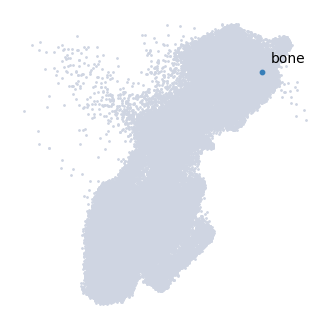

In [325]:
palantir.plot.highlight_cells_on_umap(lepr, endCell)

In [326]:
pr_res_lepr = palantir.core.run_palantir(
    lepr, startCell.index[0], num_waypoints=500, terminal_states=endCell
)

Sampling and flocking waypoints...
Time for determining waypoints: 0.04574783245722453 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...


/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs wer

Time for shortest paths: 2.918608319759369 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9996
Correlation at iteration 2: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/palantir/core.py:179: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  data.obs[pseudo_time_key] = pseudotime


/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


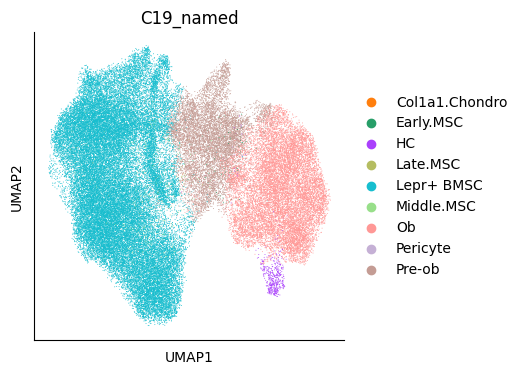

In [289]:
sc.pl.umap(lepr,color=["C19_named"])

In [327]:
lepr.obs["palantir_single"]=pr_res_lepr.pseudotime

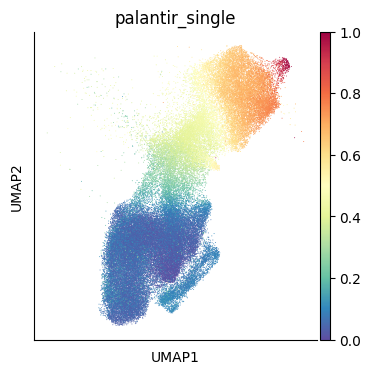

In [328]:
sc.pl.umap(lepr,color=["palantir_single"])

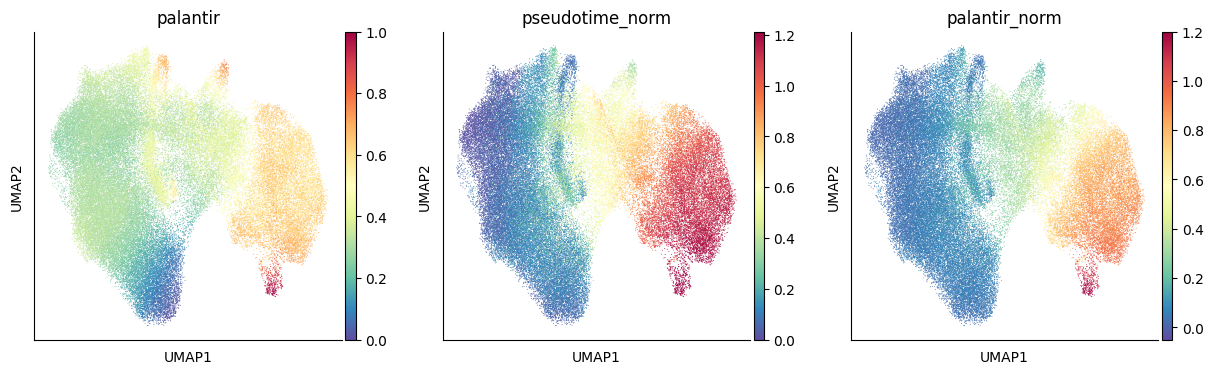

In [287]:
sc.pl.umap(lepr,color=["palantir","pseudotime_norm","palantir_norm"])

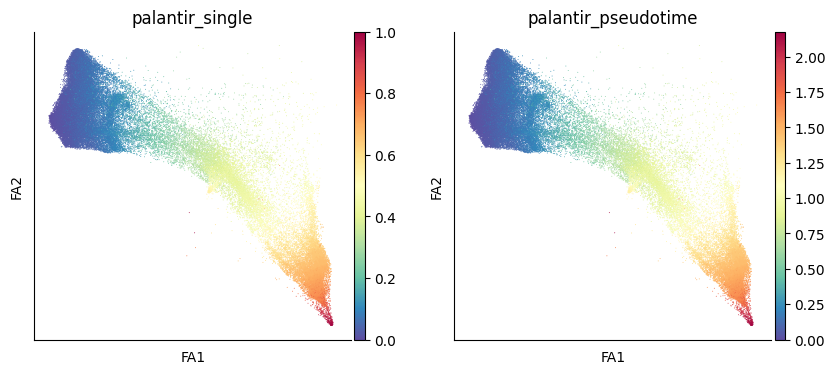

In [329]:
sc.pl.draw_graph(lepr,color=["palantir_single","palantir_pseudotime"])

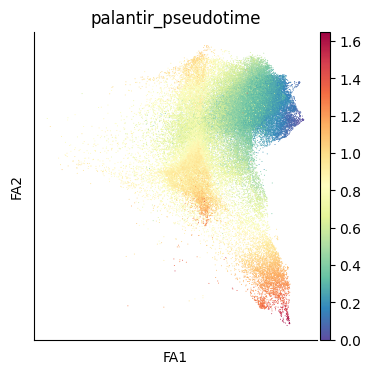

In [330]:
sc.pl.draw_graph(mes,color=["palantir_pseudotime"])

In [290]:

dm_res = palantir.utils.run_diffusion_maps(chondro, n_components=15)
ms_data = palantir.utils.determine_multiscale_space(chondro)
sc.pp.neighbors(chondro)
sc.tl.umap(chondro)

In [296]:
chondro=dpt[lineage['lineage_chondro']]

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


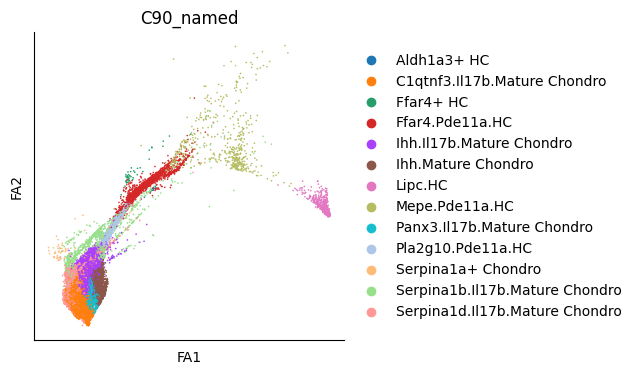

In [295]:
sc.pl.draw_graph(chondro,color="C90_named")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


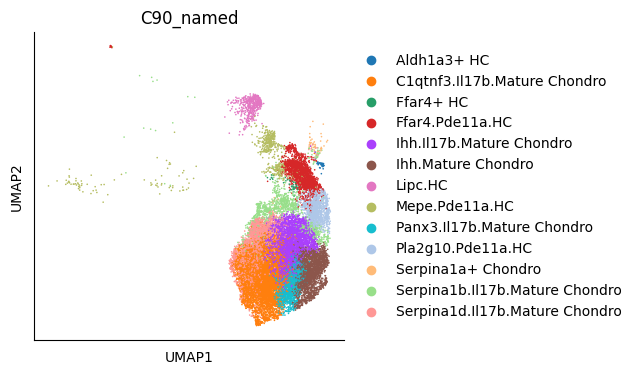

In [304]:
sc.pl.umap(chondro,color="C90_named")

In [305]:
startCell = pd.Series(
    ["Lepr"],
    index=[
           dpt.obs_names[np.flatnonzero(dpt.obs['start']  == 'Limb_Hyperchondrocyte')[15]]]
)
endCell = pd.Series(
    ["bone"],
    index=[chondro.obs_names[np.flatnonzero(chondro.obs['C90_named']  == 'Lipc.HC')[2]]]
)

(<Figure size 400x400 with 1 Axes>, <AxesSubplot: >)

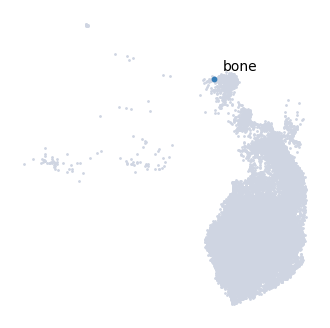

In [306]:
palantir.plot.highlight_cells_on_umap(chondro, endCell)

In [307]:
pr_res_chondro = palantir.core.run_palantir(
    chondro, startCell.index[0], num_waypoints=500, terminal_states=endCell
)

Sampling and flocking waypoints...
Time for determining waypoints: 0.0586261789004008 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 4.744136369228363 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9994
Correlation at iteration 2: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [309]:
chondro.obs["plantir_single"]=pr_res_chondro.pseudotime

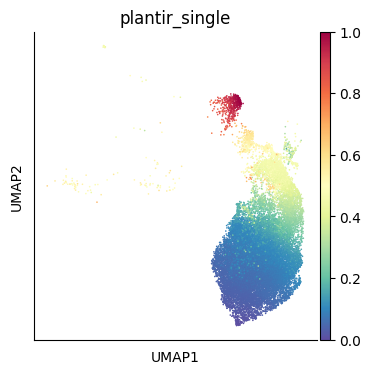

In [310]:
sc.pl.umap(chondro,color="plantir_single")

In [315]:
fibro=dpt[lineage['lineage_laFibro']]
startCell = pd.Series(
    ["Fibro"],
    index=[
           dpt.obs_names[np.flatnonzero(dpt.obs['start']  == 'LimbAdult_Fibro')[14]]]
)
endCell = pd.Series(
    ["bone"],
    index=[fibro.obs_names[np.flatnonzero(fibro.obs['C90_named']  == 'Bglap3.Ob')[1]]]
)


(<Figure size 400x400 with 1 Axes>, <AxesSubplot: >)

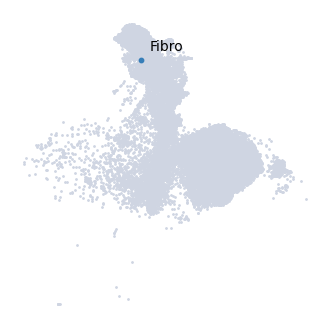

In [316]:
palantir.plot.highlight_cells_on_umap(fibro, startCell)

(<Figure size 400x400 with 1 Axes>, <AxesSubplot: >)

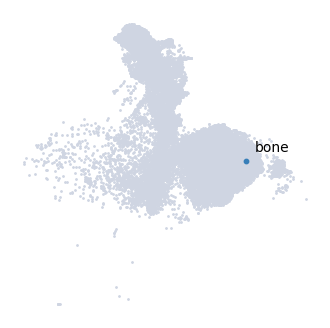

In [317]:
palantir.plot.highlight_cells_on_umap(fibro, endCell)

In [318]:
pr_res_fibro = palantir.core.run_palantir(
    fibro, startCell.index[0], num_waypoints=500, terminal_states=endCell
)

Sampling and flocking waypoints...
Time for determining waypoints: 0.021052742004394533 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 1.7644898891448975 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9978
Correlation at iteration 2: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/palantir/core.py:179: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  data.obs[pseudo_time_key] = pseudotime


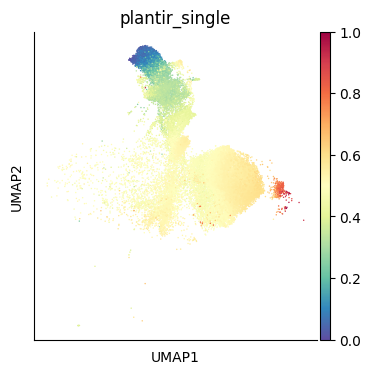

In [331]:
fibro.obs["plantir_single"]=pr_res_fibro.pseudotime
sc.pl.umap(fibro,color="plantir_single")

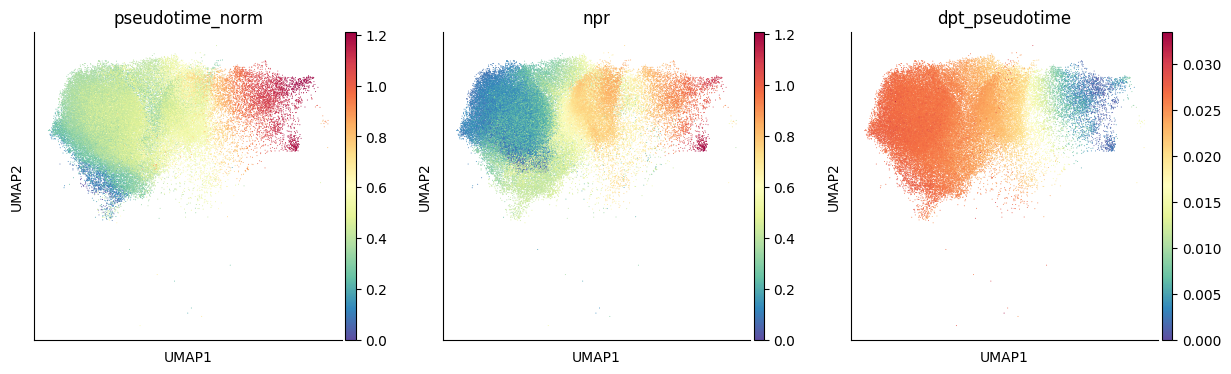

In [358]:
sc.pl.umap(mes,color=["pseudotime_norm","npr","dpt_pseudotime"],save="mes_dpt_comare")

In [361]:
adata.obs["npr"]=mes.obs["npr"]
adata.obs["pseudotime_norm"]=mes.obs["pseudotime_norm"]

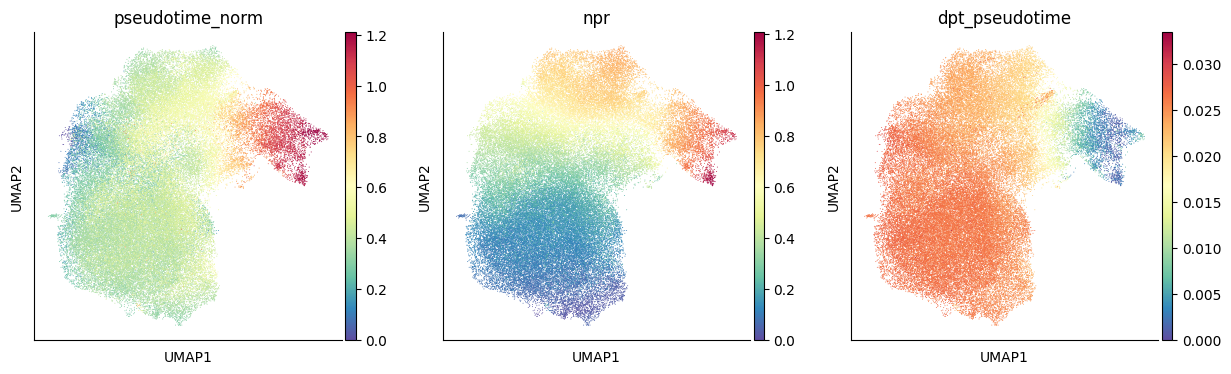

In [362]:
sc.pl.umap(adata,color=["pseudotime_norm","npr","dpt_pseudotime"],save="mes_dpt_comare")

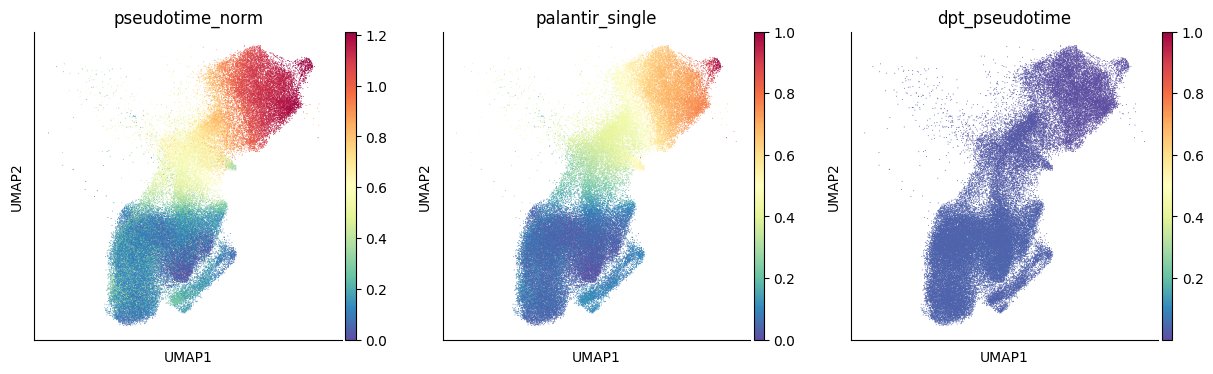

In [346]:
sc.pl.umap(lepr,color=["pseudotime_norm","palantir_single","dpt_pseudotime"],save="lepr_dpt_comare")

In [374]:
dpt.obs["new_dpt"]=dpt.obs["pseudotime_norm"]

In [375]:
dpt.obs["new_dpt"][lineage['lineage_mesenchyme']]= mes.obs["npr"]

In [376]:
dpt.obs["dpt_single"]=dpt.obs["new_dpt"]
dpt.obs["dpt_single"][lineage['lineage_chondro']]=chondro.obs["plantir_single"]
dpt.obs["dpt_single"][lineage['lineage_laFibro']]=fibro.obs["plantir_single"]
dpt.obs["dpt_single"][lineage['lineage_lepr']]=lepr.obs["palantir_single"]

In [381]:
dpt.obs["dpt_pseudotime"]

Unnamed: 0
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0    0.023907
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0    0.011629
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0    0.010862
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0    0.018808
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0    0.020474
                                                  ...   
TTTGACTGTATTTCCT-1_5-1-2                        0.020599
TTTGACTGTTGCATTG-1_5-1-2                        0.022183
TTTGACTTCTTGGGCG-1_5-1-2                        0.033691
TTTGGAGCAGCGACAA-1_5-1-2                        0.000800
TTTGGTTCACTACTTT-1_5-1-2                        0.009854
Name: dpt_pseudotime, Length: 166204, dtype: float32

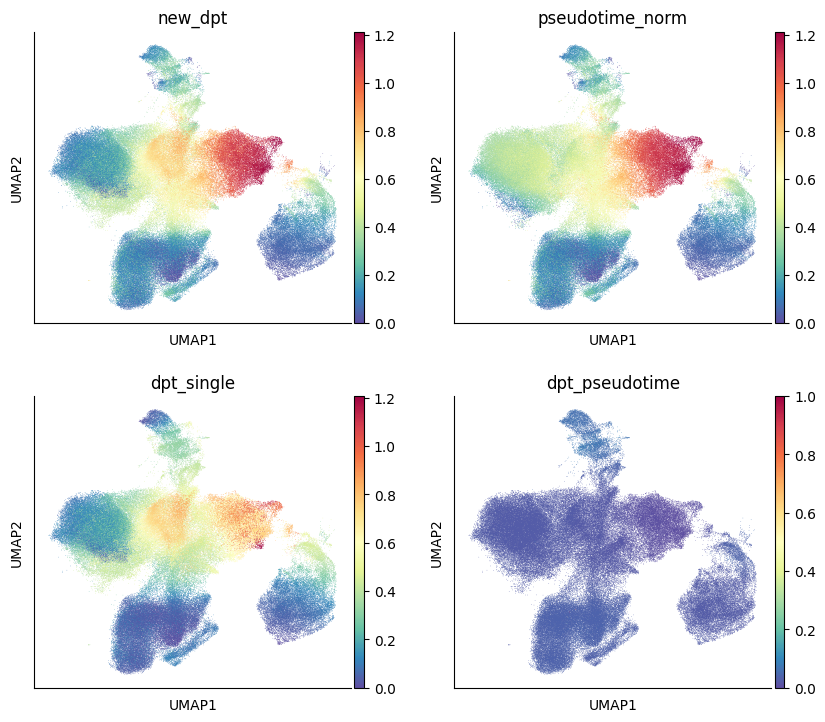

In [383]:
sc.pl.umap(dpt,color=["new_dpt","pseudotime_norm","dpt_single","dpt_pseudotime"],ncols=2,save="dpt_pseudotime_compare")

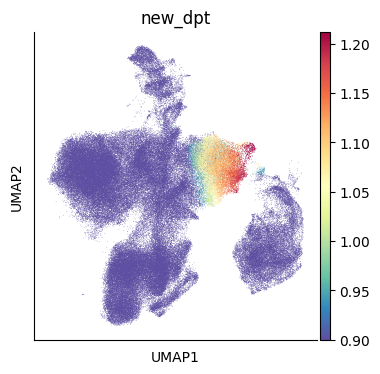

In [368]:
sc.pl.umap(dpt,color=["new_dpt"],vmin=0.9)

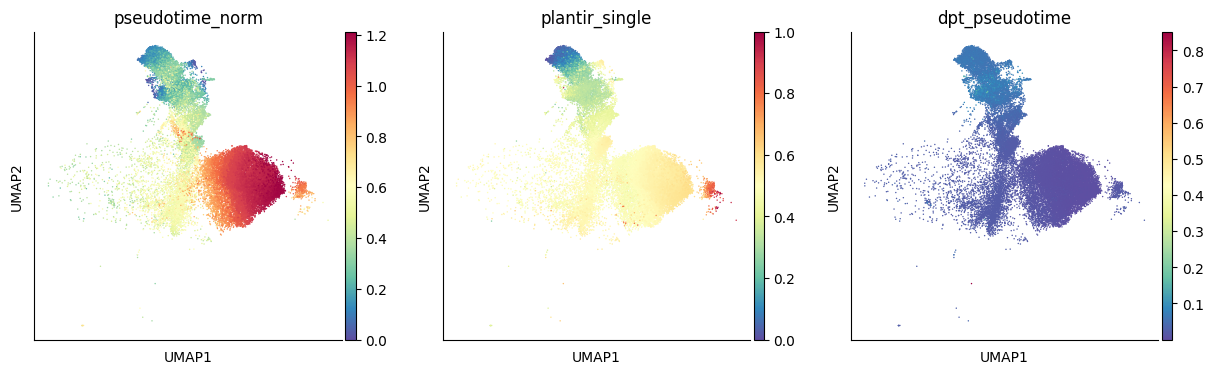

In [350]:
sc.pl.umap(fibro,color=["pseudotime_norm","plantir_single","dpt_pseudotime"],save="fibro_dpt_comare")

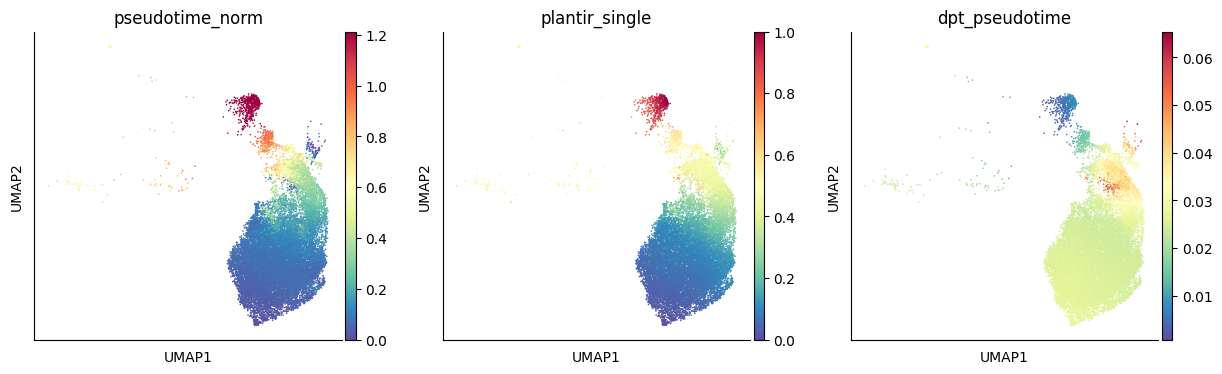

In [353]:
sc.pl.umap(chondro,color=["pseudotime_norm","plantir_single","dpt_pseudotime"],save="chondro_dpt_comare")

In [384]:
new_dpt=dpt.obs[["new_dpt","pseudotime_norm","dpt_single","dpt_pseudotime"]]

In [386]:
new_dpt.to_csv("../processed_data/11.16_new_dpt.csv")

In [387]:
dpt.write_h5ad("../../important_processed_data/11.16_dpt.h5ad")